# Assignment 4

Jesse Perla, UBC

## Student Name/Number: (doubleclick to edit)

### Instructions

-   Edit the above cell to include your name and student number.
-   Submit just this `ipynb` to Canvas. Do not rename, it associates
    your student number with the submission automatically.

In [1]:
using Distributions, Plots, LaTeXStrings, LinearAlgebra, Statistics, Random, QuantEcon, NLsolve

## Question 1

Take the example in [Simple Example with iid
Income](https://jlperla.github.io/undergrad_computational_macro/slides/permanent_income.html#/examples)
where the stochastic process for income $y_t$ follows

$$
y_t = \mu + \sigma w_t \sim N(\mu, \sigma^2)
$$

Under these assumptions, with quadratic utility and if $\beta R = 1$ the
optimal policy is

$$
\mathbb{E}_t\{c_{t+1}\} = c_t
$$

Which we can use to derive for this income process if $F_0 = y_0 = 0$.

$$
c_t = (1-\beta)\left(\mathbb{E}_t\left[\sum_{j=0}^\infty \beta^j y_{t+j}\right] + F_t\right) =  \mu + (1 - \beta) \sigma \sum_{j=1}^t w_j
$$

And finally

$$
F_t  = \sigma \sum_{j=1}^{t-1} w_j
$$

### Part (a)

Code to simulate this consumption process for $t = 1, \ldots T$ is given
below.


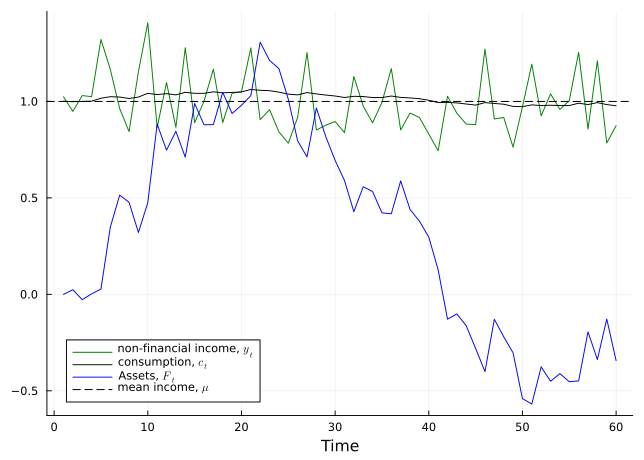

In [1]:
using Plots, Random
function simulate_iid_income(p, T; w = randn(T))
    w_sum = cumsum(w) #(w_1, w_1 + w_2, w_1 + w_2 + w_3, ... sum_{j=1}^T w_j))    
    c = p.mu .+ (1 - p.beta) * p.sigma  * w_sum # (c_1, c_2, ... c_T)
    y = p.mu .+ p.sigma * w # (y_1, y_2, ... y_T)
    F = [0.0; p.sigma * w_sum[1:end-1]] #(F_1, F_2, ... F_T)
    return (;w, F, c, y)
end

p = (;beta= 1.0 / (1.0 + 0.05), mu = 1.0, sigma = 0.15)
T = 60
res = simulate_iid_income(p, T)

plot(1:T, res.y, color = :green, label = L"non-financial income, $y_t$", xlabel="Time")
plot!(res.c, color = :black, label = L"consumption, $c_t$")
plot!(res.F, color = :blue, label = L"Assets, $F_t$")
hline!([p.mu], color = :black, linestyle = :dash, label = L"mean income, $\mu$")

Using this code, plot call the above where instead of randomly drawing
each $w \sim N(0,1)$ draw it from a distribution $w \sim N(0.5, 1)$ and
plot the results

In [1]:
# edit your code here

### Part (b)

Interpret the result of the previous graph with the standard one with
well-specified results from the perspective of consumption smoothing and
forecasting of income. In what ways is the behavior in the second case
not optimal and why?

**(double click to edit your answer)**

## Question 2

Continuing with income process defined in Part 1, rather than manually
implementing this process, [use the LSS
formulation](https://jlperla.github.io/undergrad_computational_macro/slides/permanent_income.html#/stacked-lss-for-iid-income)

$$
\begin{aligned}
\begin{bmatrix} w_{t+1} \\ 1 \end{bmatrix} &= \begin{bmatrix} 0 & 0 \\ 0 & 1 \end{bmatrix} \begin{bmatrix} w_t \\ 1 \end{bmatrix}+ \begin{bmatrix} 1 \\ 0 \end{bmatrix} w_{t+1}\\
y_t &= \begin{bmatrix} \sigma & \mu \end{bmatrix}\begin{bmatrix} w_t \\ 1 \end{bmatrix}
\end{aligned}
$$

From this, we can stack, etc. following [our
notes](https://jlperla.github.io/undergrad_computational_macro/slides/permanent_income.html#/stacked-lss)

The simulation from the code was


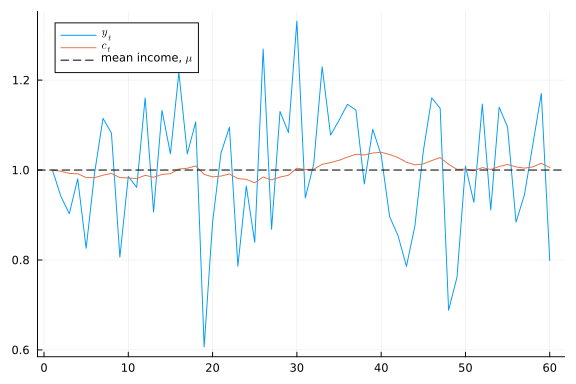

In [1]:
A = [0 0; 0 1]
G = [p.sigma p.mu]
C = [1; 0]
H = G*inv(I-p.beta*A)
A_tilde = [A zeros(2,1); H*(I-A) 1]
C_tilde = [C; 0]
G_tilde = [G 0; (1-p.beta)*H 1-p.beta]
x_tilde_0 = [0.0, 1, 0.0] #[w_0, 1, F_0]
lss_pi = LSS(A_tilde, C_tilde, G_tilde;
              mu_0 = x_tilde_0)
x, y = simulate(lss_pi, T)
plot(1:T, y[1,:];label=L"y_t", size=(600,400))
plot!(1:T, y[2,:], label=L"c_t")
hline!([p.mu], color=:black, linestyle=:dash,
       label = L"mean income, $\mu$")

### Part (a)

Try calculating the stationary distribution by modifying the code below
or trying with your existing code.

In [1]:
# modify here from previous results
# mu_x, mu_y, sigma_x, sigma_y = stationary_distributions(lss)

Explain why it does or does not converge below

**(double click to edit your answer)**

### Part (b)

Consider a variation on the state space model above where instead of the
state being above which puts the $\sigma$ in the

$$
C \equiv
\begin{bmatrix}
    \sigma \\
    0
\end{bmatrix}
$$

rather than in the $G$. Complete that state space model, and change the
implementation below (copied from the above for simplicity)


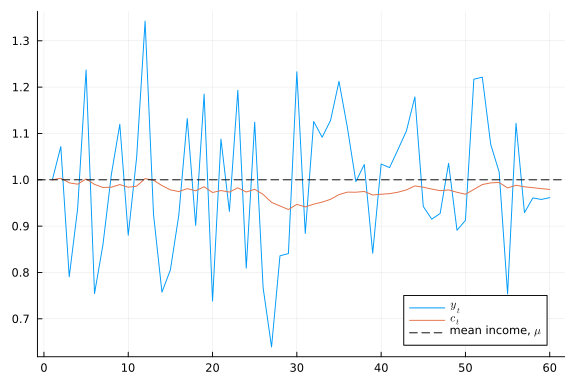

In [1]:
# Modify here
A = [0 0; 0 1]
G = [p.sigma p.mu]
C = [1; 0] # replace with $C = [\sigma; 0]$ and fix the rest of the LSS/etc.
H = G*inv(I-p.beta*A)
A_tilde = [A zeros(2,1); H*(I-A) 1]
C_tilde = [C; 0]
G_tilde = [G 0; (1-p.beta)*H 1-p.beta]
x_tilde_0 = [0.0, 1, 0.0] #[w_0, 1, F_0]
lss_pi = LSS(A_tilde, C_tilde, G_tilde;
              mu_0 = x_tilde_0)
x, y = simulate(lss_pi, T)
plot(1:T, y[1,:];label=L"y_t", size=(600,400))
plot!(1:T, y[2,:], label=L"c_t")
hline!([p.mu], color=:black, linestyle=:dash,
       label = L"mean income, $\mu$")